# Flocculation Design Challenge

Learn how to use the AguaClara code distribution and python to design a flocculator!
The [AguaClara code documentation](https://aguaclara.github.io/aguaclara/index.html) will be helpful as you search for useful functions.

30 points total
* 3 for style
* 27 for questions

In [2]:
!pip install aguaclara

In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import matplotlib.pyplot as plt
import numpy as np

In [31]:
Will_floc = ac.Flocculator(q=1*u.L/u.s,temp=15*u.degC,hl=0.5*u.m,l_max=0.6*u.m,end_water_depth=1*u.m,chan_n_parity='even',chan_w_max = 0.5*u.m,ent_l=0*u.m)
print(Will_floc.chan_w)
print(Will_floc.chan_n)
print(Will_floc.chan_l)
print(Will_floc.baffle_s)

53 centimeter
1
0.6 meter
1.758 centimeter


In [40]:
Will_sed=ac.SedimentationTank(q=6*u.L/u.s,temp=15*u.degC,l_inner=1*u.m,w_inner=1*u.m,diffuser_n=15,inlet_man_hl=1*u.cm)
Will_sed=ac.SedimentationTank(q=6*u.L/u.s,temp=15*u.degC,l_inner=1*u.m,w_inner=1*u.m,diffuser_n=15,inlet_man_hl=1*u.cm)
Will_sed.inlet_man_nd.to(u.inch)

<Quantity(6.0, 'inch')>

# Flocculator design

Below we design a flocculator using [aguaclara.design.floc](https://aguaclara.github.io/aguaclara/design/floc.html) in the aguaclara distribution version. We will use the default settings for this design except change the flow rate to 60 L/s. The available inputs (and their default values) that you can change are shown in the [documentation](https://aguaclara.github.io/aguaclara/design/floc.html). You can change any of these parameters by including their keywords in the function call.

$$S = \left( \frac{K}{2 H_e G_{CS}^2 \nu } \right)^\frac{1}{3} \frac{Q}{W_{channel}}$$

In [0]:
flow= 100 * u.L/u.s
Temperature = 0 * u.degC
myF = ac.Flocculator(q=flow,ent_l=0*u.m,temp=Temperature,hl=40*u.cm,l_max =7*u.m)

print('The number of channels is', myF.chan_n)
print('The channel length is',myF.chan_l)
print('The channel width is',ac.round_sig_figs(myF.chan_w,3))
print('The spacing between baffles is',ac.round_sig_figs(myF.baffle_s,2))
print('The number of obstacles per baffle is', myF.obstacle_n)
print('The velocity gradient is', ac.round_sig_figs(myF.vel_grad_avg,2))
print('The residence time used for design is',ac.round_sig_figs(myF.retention_time,2))
print('The maximum distance between flow expansions is', ac.round_sig_figs(myF.expansion_h_max,2))
#print('The drain diameter is', myF.drain_nd)
print('Velocity',(flow/(myF.chan_w * myF.baffle_s)).to(u.m/u.s))
print('The Gt is',myF.gt)

Floc_total_L = myF.chan_l *myF.chan_n - myF.ent_l
Expansions_n = np.floor((Floc_total_L / myF.baffle_s * myF.expansion_n).to(u.dimensionless))
print('There are',Expansions_n.magnitude,'flow expansions.')

v = myF.q/(myF.baffle_s * myF.chan_w)
Expansion_HL = (myF.BAFFLE_K * (v**2) / (2 * u.standard_gravity)).to(u.cm)
print('The head loss per flow expansions is', ac.round_sig_figs(Expansion_HL,3))

Floc_headloss = Expansion_HL * Expansions_n
print('The total head loss in the flocculator is', ac.round_sig_figs(Floc_headloss,2))
PiHS = ((myF.end_water_depth/(myF.obstacle_n+1))/myF.baffle_s).to(u.dimensionless)
print('The H/S ratio is',PiHS)

The number of channels is 6
The channel length is 7 meter
The channel width is 73 centimeter
The spacing between baffles is 63 centimeter
The number of obstacles per baffle is 0 dimensionless
The velocity gradient is 60 / second
The residence time used for design is 610 second
The maximum distance between flow expansions is 3.2 meter
Velocity 0.2173 meter / second
The Gt is 37000
There are 66.0 flow expansions.
The head loss per flow expansions is 0.602 centimeter
The total head loss in the flocculator is 40 centimeter
The H/S ratio is 3.172 dimensionless


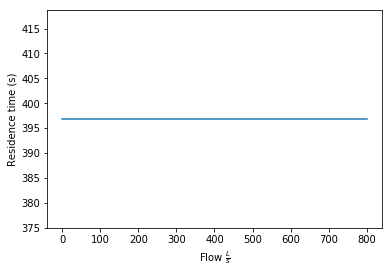

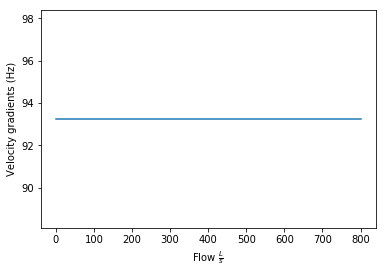

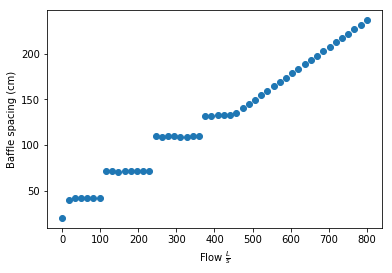

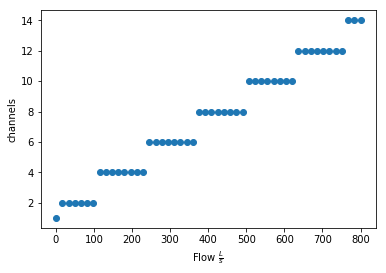

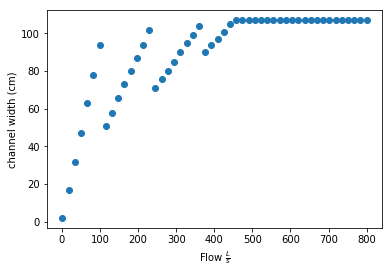

In [0]:
n = 50
mytemp = 15*u.degC
GraphQ = np.linspace(0.001,1,n)*800*u.L/u.s
myFs =np.empty(n, dtype=type(myF))
residencetimes = np.empty(n)*u.s
gradients = np.empty(n)*u.Hz
bafflespacing = np.empty(n)*u.cm
channels = np.empty(n)
channel_w = np.empty(n)*u.cm
for i in range(n):
  myFs[i] = ac.Flocculator(q=GraphQ[i],temp = mytemp,end_water_depth=4*u.m)
  residencetimes[i] = myFs[i].retention_time
  gradients[i] = myFs[i].vel_grad_avg
  bafflespacing[i] = myFs[i].baffle_s
  channels[i] = myFs[i].chan_n
  channel_w[i] = myFs[i].chan_w


plt.plot(GraphQ, residencetimes  ,'-');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Residence time (s)');
plt.show()

plt.plot(GraphQ, gradients  ,'-');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Velocity gradients (Hz)');
plt.show()

plt.plot(GraphQ, bafflespacing  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Baffle spacing (cm)');
plt.show()

plt.plot(GraphQ, channels  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('channels');
plt.show()

plt.plot(GraphQ, channel_w  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('channel width (cm)');
plt.show()

In [0]:
(ac.ID_sch40(1*u.inch)).to(u.cm)

<Quantity(2.66446, 'centimeter')>